<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/GRADUATE_ADMISSION_PROJECT_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#LOAD THE DATA
data = pd.read_csv('admission.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe(include = 'all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data_clean= data.drop(['Serial No.'], axis = 1)

In [8]:
data_clean.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
data.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
395         396        324          110  ...  9.04         1              0.82
396         397        325          107  ...  9.11         1              0.84
397         398        330          116  ...  9.45         1              0.91
398         399        312          103  ...  8.78         0              0.67
399         400        333          117  ...  9.66         1              0.95

[400 rows x 9 colum

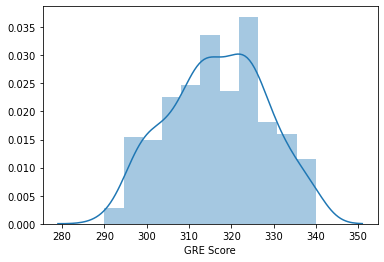

In [10]:
sns.distplot(data_clean['GRE Score'])

In [12]:
s = data_clean['GRE Score'].quantile(0.01)
data_1 = data_clean[data_clean['GRE Score']>s]
data_1.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,317.118987,107.531646,3.103797,3.421519,3.465823,8.612025,0.551899,0.727165
std,11.202271,5.994150,1.134087,0.994359,0.890999,0.588263,0.497930,0.141059
min,295.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.200000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.075000,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


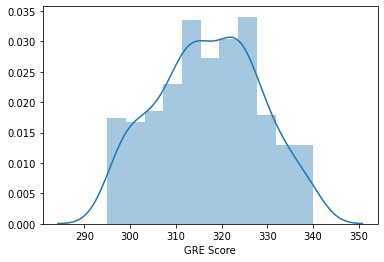

In [13]:
sns.distplot(data_1['GRE Score'])

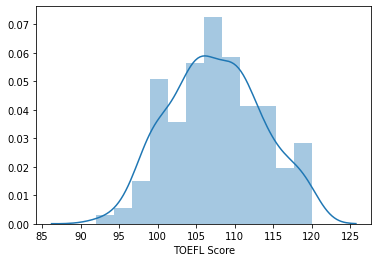

In [14]:
sns.distplot(data_1['TOEFL Score'])

In [15]:
s = data_1['TOEFL Score'].quantile(0.01)
data_2 = data_1[data_1['TOEFL Score']>s]
data_2.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,317.324808,107.675192,3.122762,3.436061,3.483376,8.623504,0.554987,0.729923
std,11.070607,5.851966,1.123305,0.986319,0.877265,0.579559,0.497604,0.139056
min,295.000000,96.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,309.500000,103.500000,2.000000,2.750000,3.000000,8.200000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.835000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


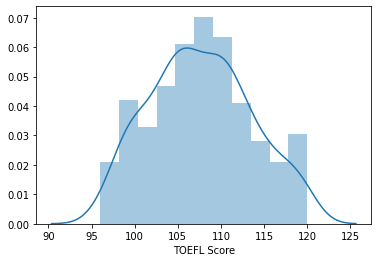

In [16]:
sns.distplot(data_2['TOEFL Score'])

In [17]:
data_2.columns.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '], dtype=object)

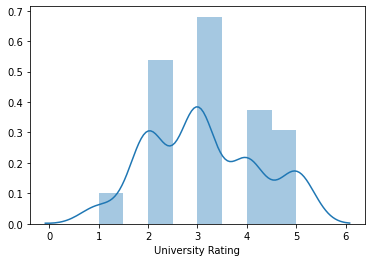

In [18]:
sns.distplot(data_2['University Rating'])


In [21]:
s = data_2['University Rating'].quantile(0.01)
data_3 = data_2[data_2['University Rating']>s]
data_3.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,317.956873,108.064690,3.237197,3.514825,3.544474,8.666792,0.571429,0.738437
std,10.893007,5.715897,1.036009,0.933127,0.848713,0.552896,0.495540,0.136272
min,295.000000,96.000000,2.000000,1.000000,1.500000,7.280000,0.000000,0.340000
25%,310.000000,104.000000,2.000000,3.000000,3.000000,8.260000,0.000000,0.650000
50%,318.000000,108.000000,3.000000,3.500000,3.500000,8.660000,1.000000,0.740000
75%,326.000000,112.000000,4.000000,4.000000,4.000000,9.100000,1.000000,0.840000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


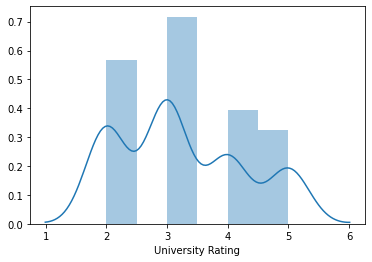

In [22]:
sns.distplot(data_3['University Rating'])

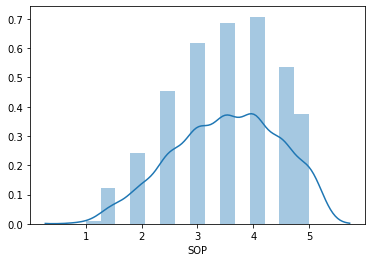

In [23]:
sns.distplot(data_3['SOP'])

In [24]:
s = data_3['SOP'].quantile(0.01)
data_4 = data_3[data_3['SOP']>s]
data_4.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,318.486034,108.382682,3.270950,3.589385,3.589385,8.698268,0.583799,0.746061
std,10.651788,5.541939,1.029968,0.861794,0.825266,0.534292,0.493618,0.131900
min,295.000000,96.000000,2.000000,2.000000,1.500000,7.280000,0.000000,0.340000
25%,311.000000,104.000000,2.000000,3.000000,3.000000,8.300000,0.000000,0.660000
50%,319.000000,108.000000,3.000000,3.500000,3.500000,8.670000,1.000000,0.745000
75%,326.000000,112.000000,4.000000,4.375000,4.000000,9.107500,1.000000,0.840000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


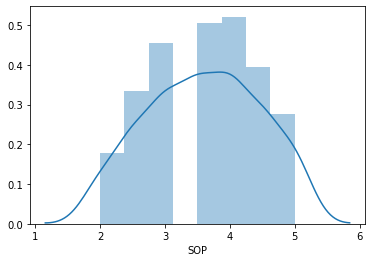

In [25]:
sns.distplot(data_4['SOP'])

In [26]:
data_4

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


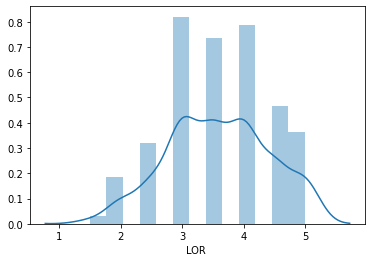

In [27]:
sns.distplot(data_4['LOR '])

In [28]:
s = data_4['LOR '].quantile(0.01)
data_5 = data_4[data_4['LOR ']>s]
data_5.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,318.976261,108.629080,3.326409,3.646884,3.692878,8.730059,0.596439,0.753531
std,10.529693,5.485542,1.026574,0.847755,0.733880,0.526852,0.491341,0.128773
min,295.000000,97.000000,2.000000,2.000000,2.500000,7.280000,0.000000,0.340000
25%,312.000000,105.000000,3.000000,3.000000,3.000000,8.330000,0.000000,0.680000
50%,320.000000,109.000000,3.000000,3.500000,3.500000,8.690000,1.000000,0.750000
75%,326.000000,112.000000,4.000000,4.500000,4.000000,9.110000,1.000000,0.850000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


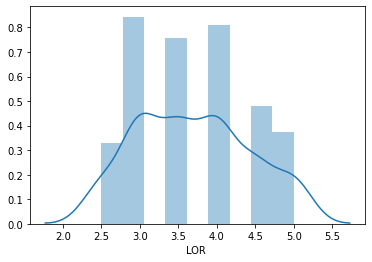

In [29]:
sns.distplot(data_5['LOR '])

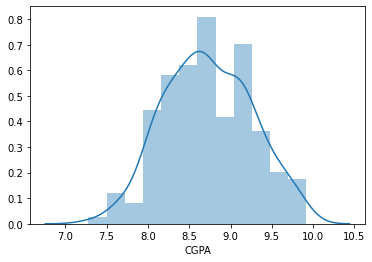

In [30]:
sns.distplot(data_5['CGPA'])

In [31]:
s = data_5['CGPA'].quantile(0.01)
data_6 = data_5[data_5['CGPA']>s]
data_6.describe(include  = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,319.174699,108.728916,3.343373,3.665663,3.703313,8.748193,0.605422,0.756898
std,10.424505,5.455561,1.023671,0.838803,0.733378,0.509084,0.489498,0.126284
min,296.000000,97.000000,2.000000,2.000000,2.500000,7.660000,0.000000,0.340000
25%,312.000000,105.000000,3.000000,3.000000,3.000000,8.340000,0.000000,0.680000
50%,320.000000,109.000000,3.000000,3.500000,3.500000,8.710000,1.000000,0.760000
75%,326.250000,112.000000,4.000000,4.500000,4.000000,9.120000,1.000000,0.852500
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


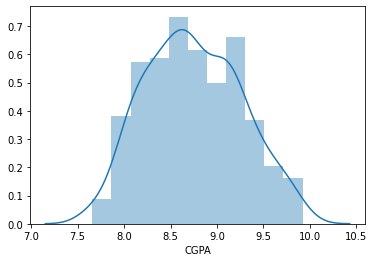

In [32]:
sns.distplot(data_6['CGPA'])

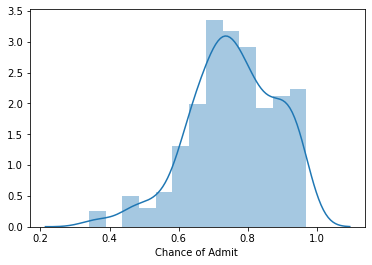

In [33]:
sns.distplot(data_6['Chance of Admit '])

In [34]:
s = data_6['Chance of Admit '].quantile(0.01)
data_7 = data_6[data_6['Chance of Admit ']>s]
data_7.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,319.396341,108.850610,3.353659,3.670732,3.713415,8.760335,0.612805,0.761677
std,10.287381,5.372851,1.024136,0.830311,0.730634,0.499748,0.487853,0.119322
min,296.000000,97.000000,2.000000,2.000000,2.500000,7.670000,0.000000,0.440000
25%,312.000000,105.000000,3.000000,3.000000,3.000000,8.367500,0.000000,0.680000
50%,320.000000,109.000000,3.000000,3.500000,3.500000,8.730000,1.000000,0.760000
75%,327.000000,112.000000,4.000000,4.500000,4.000000,9.122500,1.000000,0.860000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


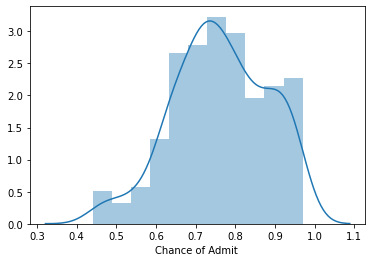

In [35]:
sns.distplot(data_7['Chance of Admit '])

In [36]:
data_clean = data_7.reset_index(drop = True)

In [37]:
data_clean.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,319.396341,108.850610,3.353659,3.670732,3.713415,8.760335,0.612805,0.761677
std,10.287381,5.372851,1.024136,0.830311,0.730634,0.499748,0.487853,0.119322
min,296.000000,97.000000,2.000000,2.000000,2.500000,7.670000,0.000000,0.440000
25%,312.000000,105.000000,3.000000,3.000000,3.000000,8.367500,0.000000,0.680000
50%,320.000000,109.000000,3.000000,3.500000,3.500000,8.730000,1.000000,0.760000
75%,327.000000,112.000000,4.000000,4.500000,4.000000,9.122500,1.000000,0.860000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [38]:
#CHECK OLS ASSUMPTIONS:-
#Ordinary least squares (OLS) regression is a statistical method
#of analysis that estimates the relationship between one or more 
#independent variables and a dependent variable

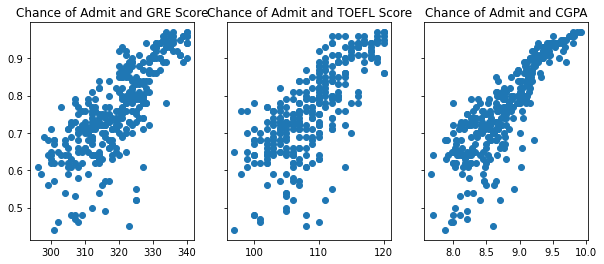

In [39]:
#f,ax(1,2,3)
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(10,4))
ax1.scatter(data_clean['GRE Score'], data_clean['Chance of Admit '])
ax1.set_title('Chance of Admit and GRE Score')

ax2.scatter(data_clean['TOEFL Score'], data_clean['Chance of Admit '])
ax2.set_title('Chance of Admit and TOEFL Score')

ax3.scatter(data_clean['CGPA'],data_clean['Chance of Admit '])
ax3.set_title('Chance of Admit and CGPA')

plt.show()

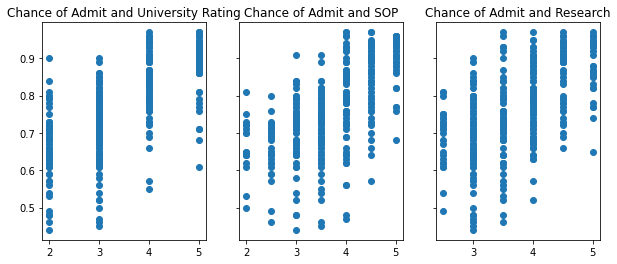

In [40]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(10,4))
ax1.scatter(data_clean['University Rating'], data_clean['Chance of Admit '])
ax1.set_title('Chance of Admit and University Rating')

ax2.scatter(data_clean['SOP'], data_clean['Chance of Admit '])
ax2.set_title('Chance of Admit and SOP')

ax3.scatter(data_clean['LOR '],data_clean['Chance of Admit '])
ax3.set_title('Chance of Admit and Research')

plt.show()


In [42]:
data_clean = data_clean.reset_index(drop = True)

In [43]:
data_clean.describe(include = 'all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,319.396341,108.850610,3.353659,3.670732,3.713415,8.760335,0.612805,0.761677
std,10.287381,5.372851,1.024136,0.830311,0.730634,0.499748,0.487853,0.119322
min,296.000000,97.000000,2.000000,2.000000,2.500000,7.670000,0.000000,0.440000
25%,312.000000,105.000000,3.000000,3.000000,3.000000,8.367500,0.000000,0.680000
50%,320.000000,109.000000,3.000000,3.500000,3.500000,8.730000,1.000000,0.760000
75%,327.000000,112.000000,4.000000,4.500000,4.000000,9.122500,1.000000,0.860000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [44]:
#LINEAR REGRESSION :-

In [45]:
#DECLARE:-(Inputs and Targets)
targets = data_clean['Chance of Admit ']
inputs = data_clean.drop(['Chance of Admit '], axis = 1)

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
inputs_scaled = scaler.transform(inputs)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 10)

In [55]:
lr= LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print('ACCURACY IS:',lr.score(x_test,y_test))

ACCURACY IS: 0.8168327034981828


In [59]:
#CREATING THE REGRESSION:

In [60]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pre = reg.predict(x_train)

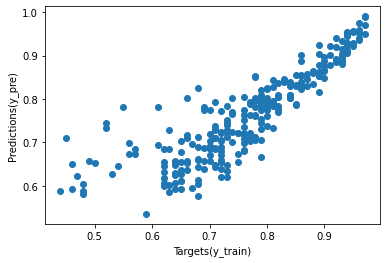

In [62]:
plt.scatter(y_train, y_pre)
plt.xlabel('Targets(y_train)', size = 10)
plt.ylabel('Predictions(y_pre)', size = 10)
plt.show()

Text(0.5, 1.0, 'Residual PDFs')

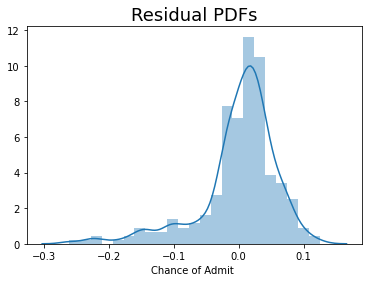

In [64]:
# Residuals plot:-
sns.distplot(y_train - y_pre)
plt.title('Residual PDFs', size =18)

In [65]:
reg.score(x_train,y_train)


0.7502385318894743

In [66]:
reg.intercept_

0.7604763042030749

In [67]:
reg.coef_

array([ 0.01467904,  0.01300417,  0.01057954, -0.00300266,  0.01535322,
        0.05771833,  0.01300283])

In [68]:
reg_sy= pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_sy['Weights'] = reg.coef_
reg_sy

,Features,Weights
0,GRE Score,0.014679
1,TOEFL Score,0.013004
2,University Rating,0.010580
3,SOP,-0.003003
4,LOR,0.015353
5,CGPA,0.057718
6,Research,0.013003


In [69]:
#TESTING:
y_pre_test = reg.predict(x_test)

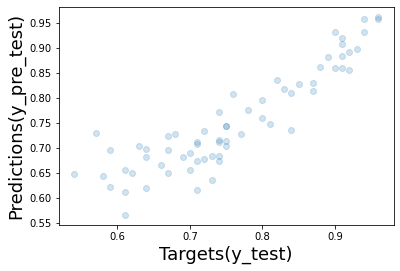

In [70]:
plt.scatter(y_test, y_pre_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size = 18)
plt.ylabel('Predictions(y_pre_test)', size = 18)

plt.show()

In [71]:
df_pf = pd.DataFrame(np.exp(y_pre_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,1.853628
1,1.890488
2,2.086638
3,2.245794
4,2.069615


In [72]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,1.853628,NaN
1,1.890488,2.138276
2,2.086638,NaN
3,2.245794,NaN
4,2.069615,NaN
...,...,...
61,1.963819,NaN
62,2.507379,NaN
63,2.216331,NaN
64,1.863012,2.509290


In [73]:
y_test= y_test.reset_index(drop=True)
y_test.head()

0    0.71
1    0.73
2    0.84
3    0.84
4    0.77
Name: Chance of Admit , dtype: float64

In [74]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,1.853628,2.033991
1,1.890488,2.075081
2,2.086638,2.316367
3,2.245794,2.316367
4,2.069615,2.159766
...,...,...
61,1.963819,2.095936
62,2.507379,2.484323
63,2.216331,2.225541
64,1.863012,1.803988


In [75]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [76]:
df_pf['Difference'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference
0,1.853628,2.033991,0.180364,8.867469
1,1.890488,2.075081,0.184593,8.895695
2,2.086638,2.316367,0.229729,9.917643
3,2.245794,2.316367,0.070573,3.046699
4,2.069615,2.159766,0.090151,4.174114
...,...,...,...,...
61,1.963819,2.095936,0.132117,6.303468
62,2.507379,2.484323,-0.023057,0.928093
63,2.216331,2.225541,0.009210,0.413834
64,1.863012,1.803988,-0.059024,3.271838


In [77]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '% 2f' % x)

In [78]:
df_pf.sort_values(by = ['Difference'])

,Predictions,Target,Residual,Difference
56,2.615811,2.611696,-0.004115,0.157549
52,2.478709,2.484323,0.005613,0.225952
27,2.029155,2.033991,0.004836,0.237759
42,2.039481,2.033991,-0.005489,0.269880
8,1.845624,1.840431,-0.005193,0.282168
40,2.604140,2.611696,0.007556,0.289323
63,2.216331,2.225541,0.009210,0.413834
48,2.170550,2.181472,0.010922,0.500693
24,2.106358,2.117000,0.010642,0.502684
9,2.105293,2.117000,0.011707,0.552995
